In [204]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [205]:
# read the dataset
df = pd.read_csv("wine.csv")

# Task 1: Exploratory Data Analysis (EDA):

In [207]:
# check number of rows and columns
df.shape

(178, 14)

In [208]:
# check top few rows
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [209]:
# check last few rows
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [210]:
# check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [211]:
# all are numerical data types and all are correct in data types with respect to data points. No need of encoding

In [212]:
# summary statistics
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [213]:
# it seems data is almost normal distribution and no outliers are present

In [214]:
# checking the missing values but found no missing values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [215]:
# checking for duplicae values and no duplicate record are found
df.duplicated().sum()

0

In [216]:
# type column has only 3 unique values
df.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [217]:
# there is no wrong data.
for i in df.columns:
    print({i:df[i].unique()})

{'Type': array([1, 2, 3], dtype=int64)}
{'Alcohol': array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.

In [218]:
# type columns has values 1,2,3
df["Type"].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [219]:
# type columns shows the clustered values of dataset how data is clustered. So we are dropping the type columns
df.drop(columns='Type', inplace=True)

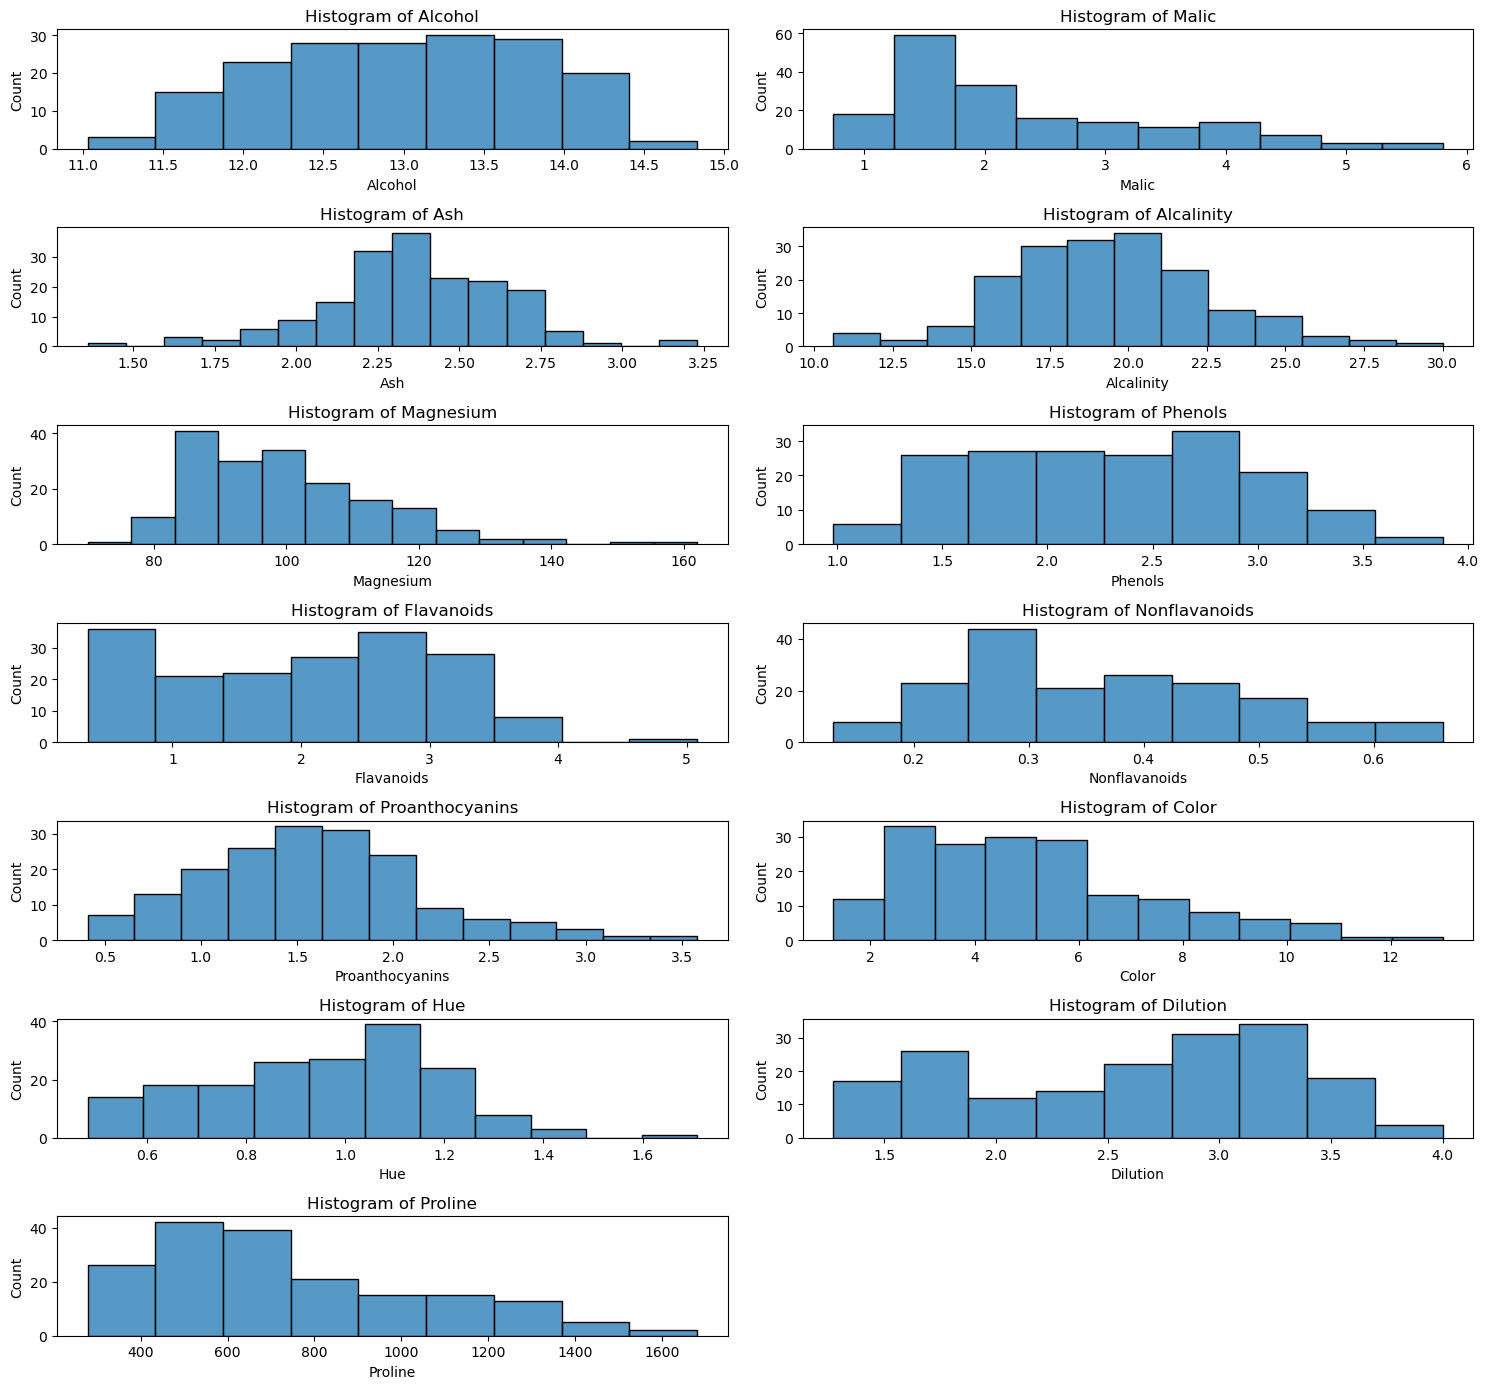

In [220]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

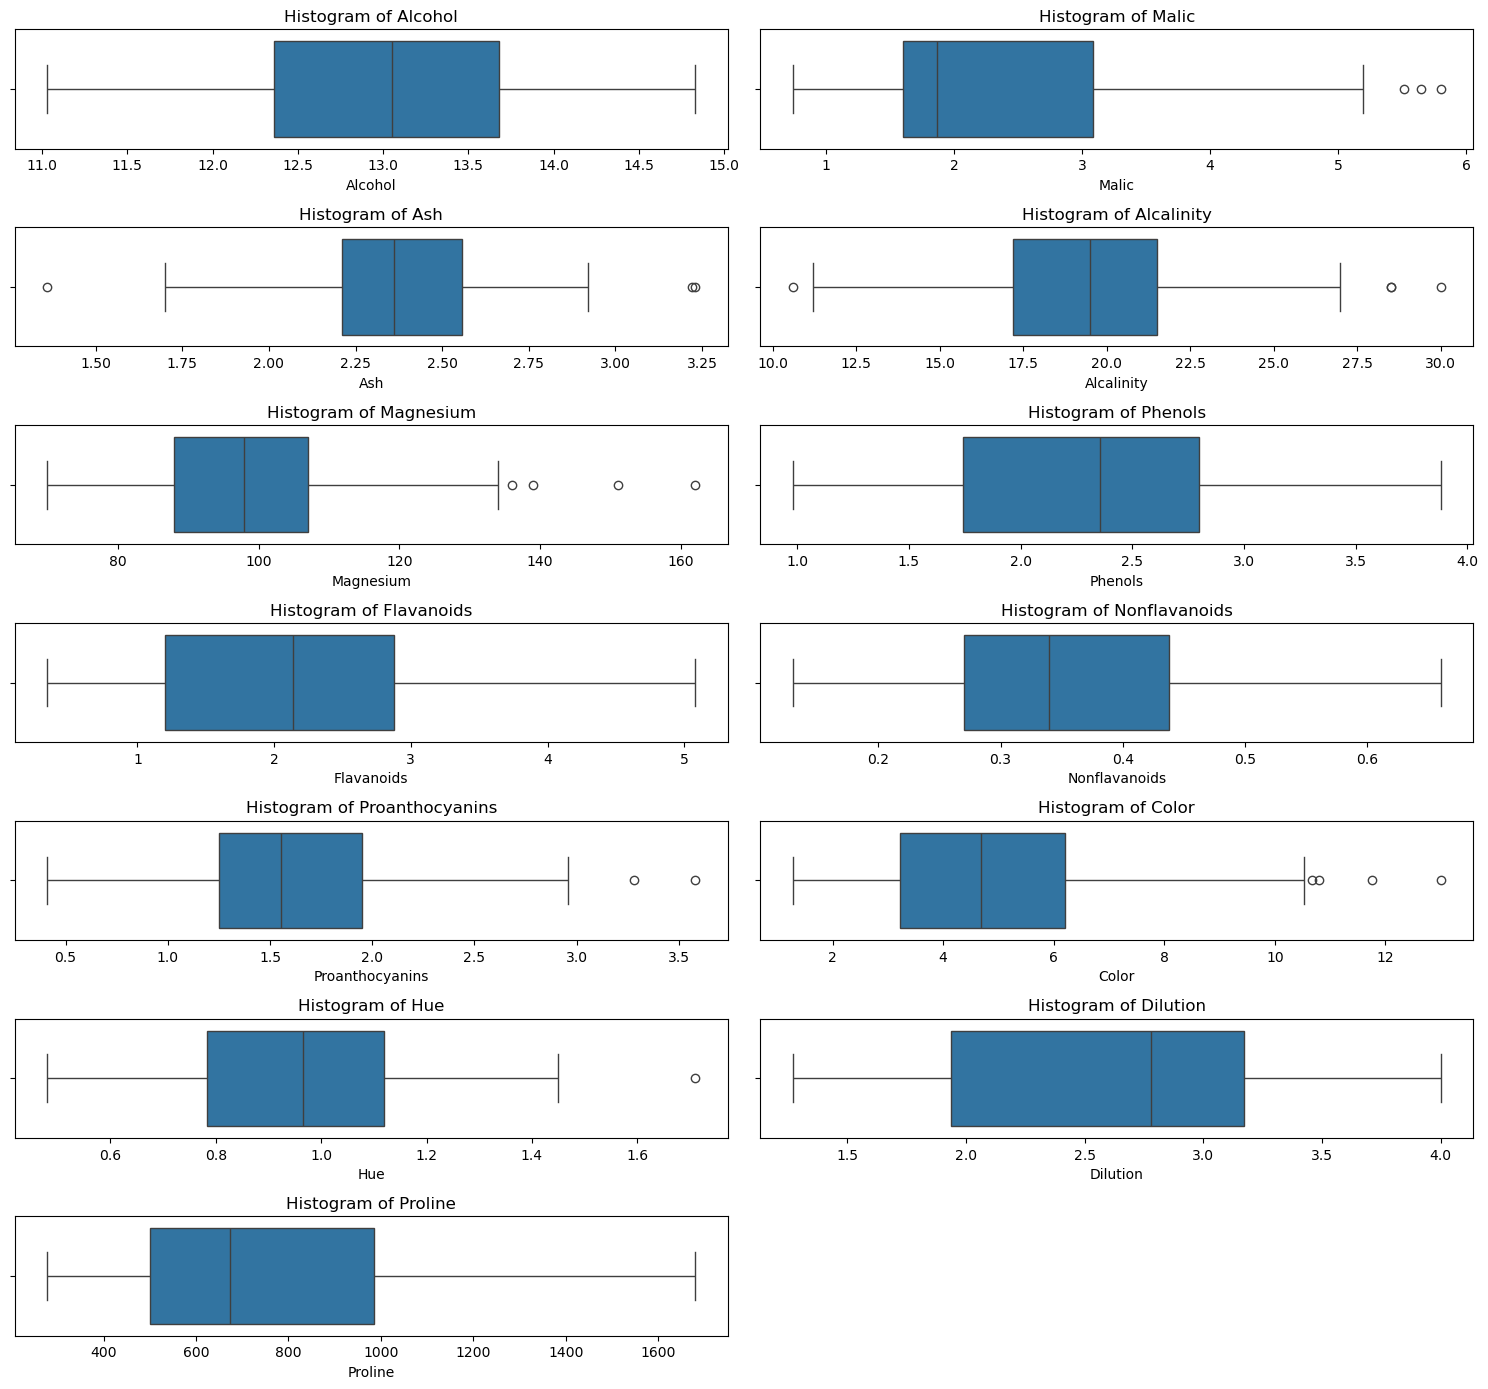

In [221]:
# Boxplot for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

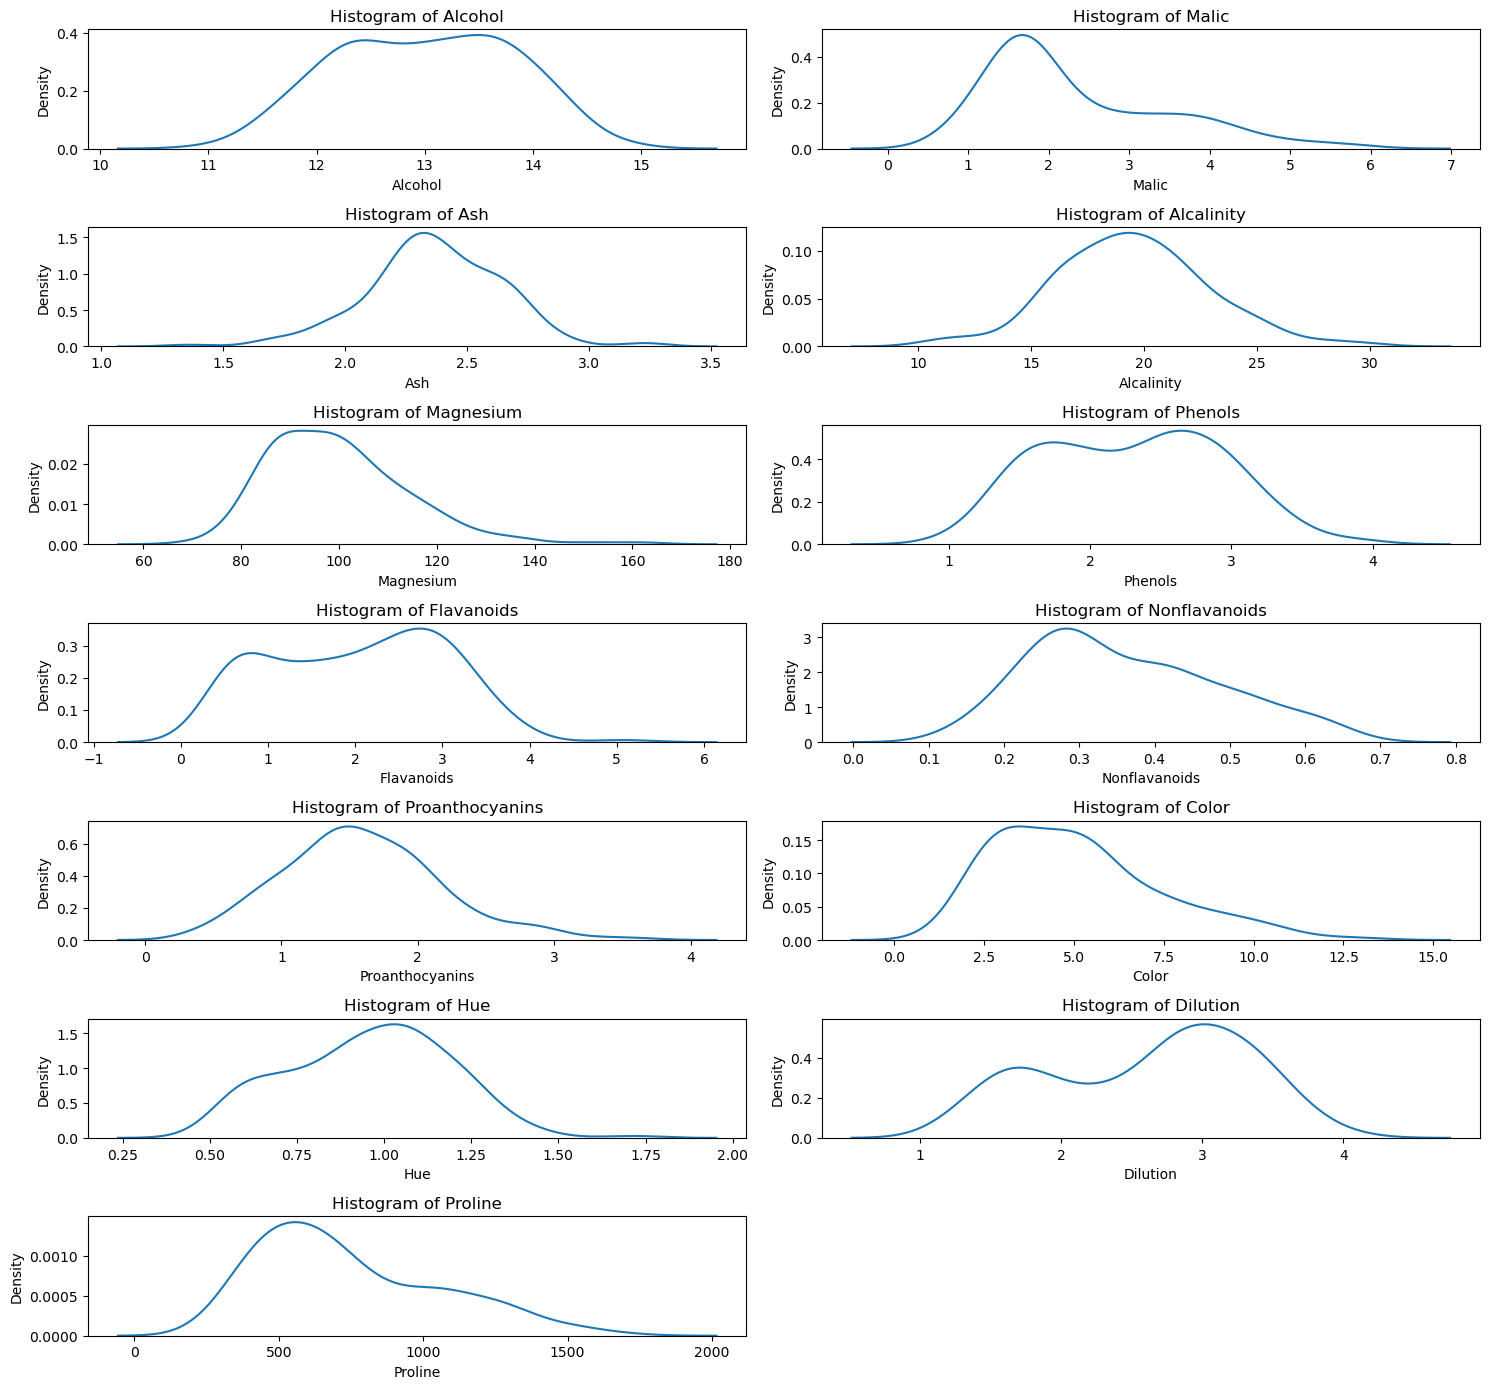

In [222]:
# KDE Plot for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.kdeplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

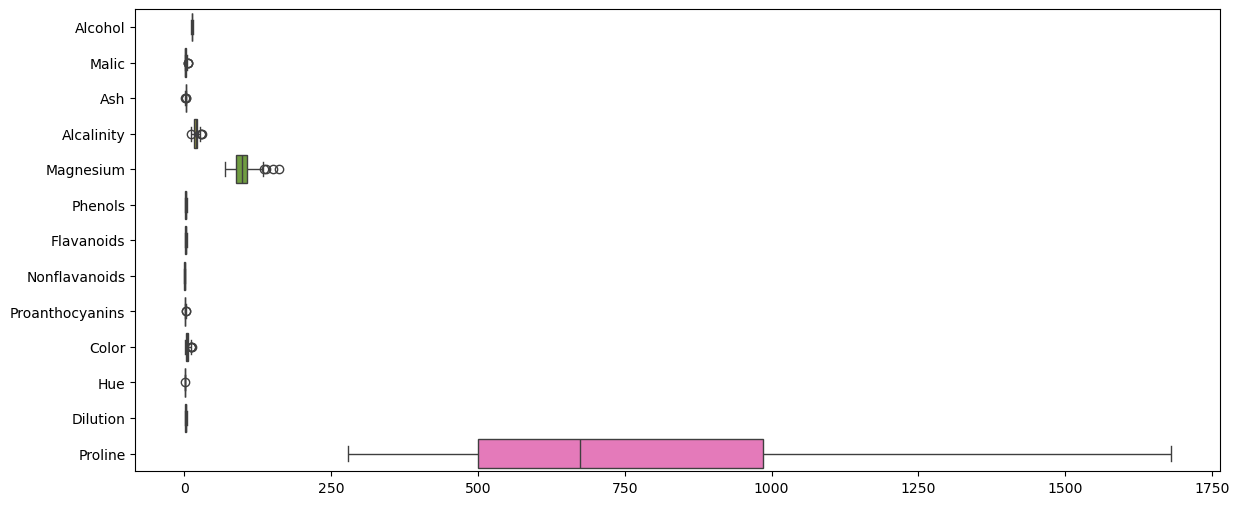

In [223]:
# boxplot for all columns
fig = plt.figure(figsize=(14,6))
sns.boxplot(data=df, orient="h")
plt.show()

In [224]:
# correlation matrix
df.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


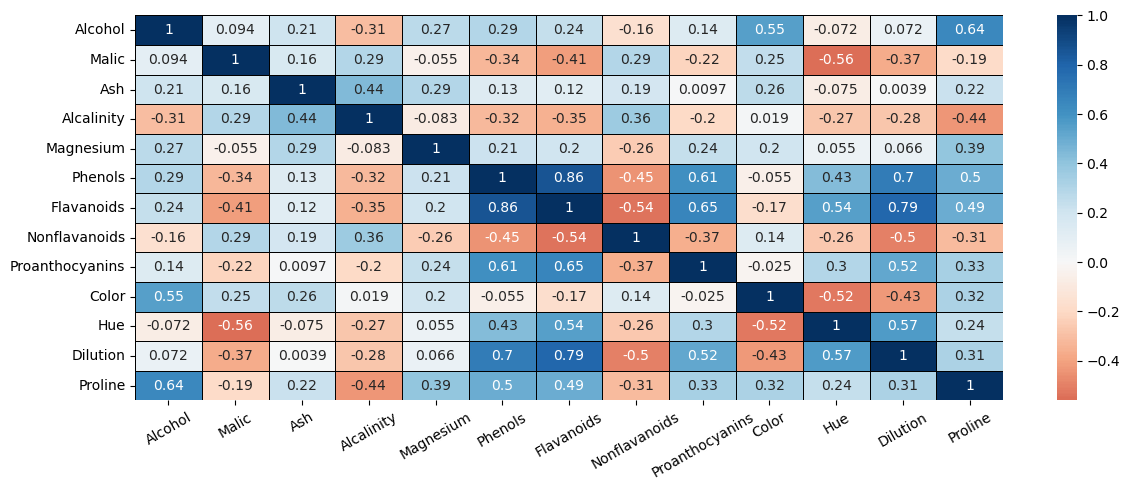

In [225]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),cmap='RdBu',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.xticks(rotation=30)
plt.show()

In [226]:
# Flavanoids and Phenol has strong positive correlation
# Dilution and Flavanoids has moderate positive correlation
# Hue and Malic has moderate negative correlation
# Nonfavanoids and Flavanoids has moderte negative correlation

In [227]:
# pairplot to see relation between each variable
# sns.pairplot(data=df)
# plt.tight_layout()
# plt.show()

# Task 2: Dimensionality Reduction with PCA:

In [229]:
# standardizing the dataset with standard scaler
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [230]:
# apply PCA on standard scaled data
pca = PCA(n_components=df.shape[1])
pca_values = pca.fit_transform(df_std)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [231]:
#loadings or weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [232]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [233]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [234]:
# 5 to 7 components able to explain 80%-90%. But 3 components explained 66.53% only and using PCA is not useful if we consider more than 3 components

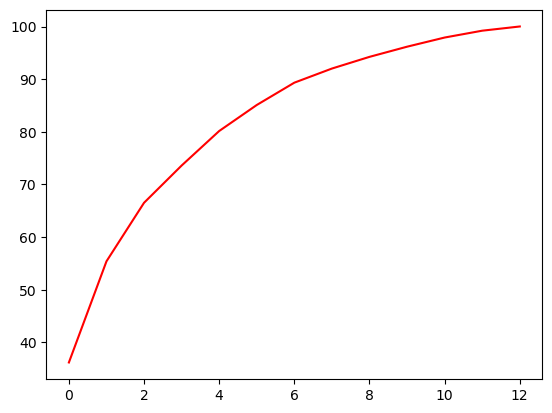

In [235]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")

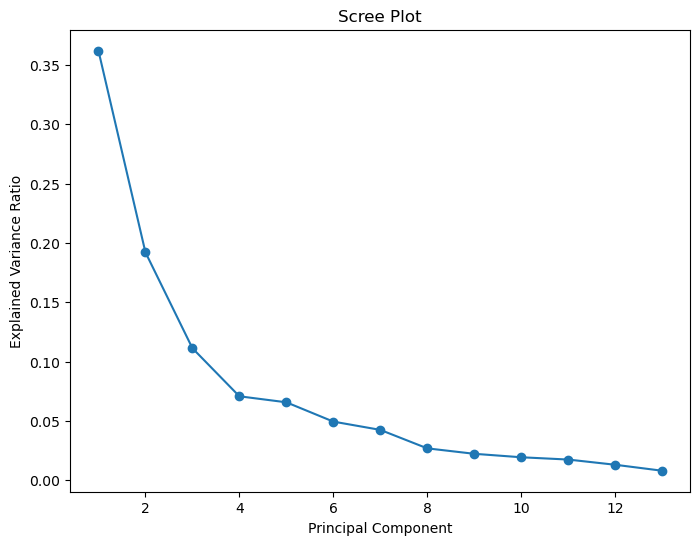

In [236]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

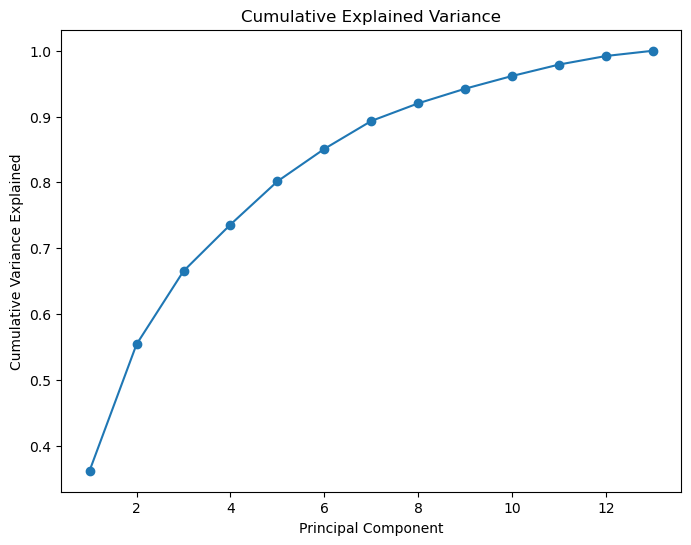

In [237]:
# Cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [238]:
# taking 3 components because it PCA is not useful if we consider more than 3 components
pca_values[:,0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [239]:
# creating data frame with 3 components
df_std_pca = pd.concat([pd.DataFrame(pca_values[:,0:3], columns=['pc1','pc2','pc3'])])
df_std_pca

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


<Axes: xlabel='pc1', ylabel='pc2'>

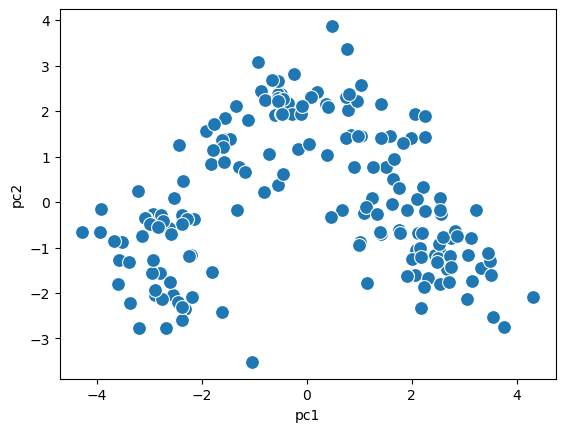

In [240]:
sns.scatterplot(data=df_std_pca,x='pc1',y='pc2',s=100)

# Task 3: Clustering with Original Data:

C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

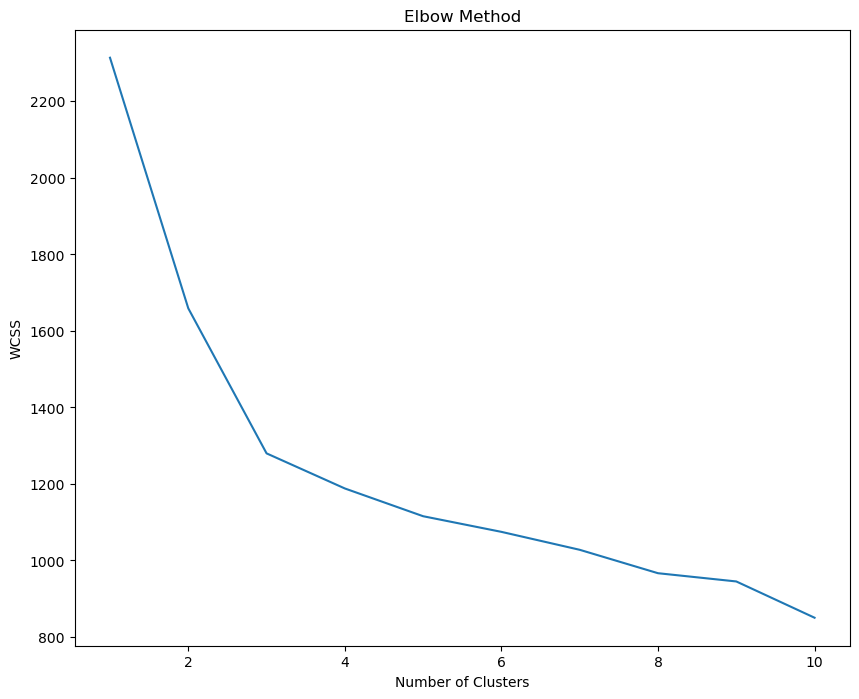

In [242]:
# finding the optimal number of cluster using elbow method for KMeans clustering
fig = plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [243]:
# Apply K-means clustering
clusters_kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = clusters_kmeans.fit_predict(df_std)

C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [244]:
clusters_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [245]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [246]:
clusters_kmeans.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [247]:
clusters_kmeans.inertia_

1277.9284888446423

In [248]:
# storing the cluster values in seperate column
df_kmeans = pd.DataFrame(df_std, columns=df.columns)
df_kmeans['clusters_kmeans'] = clusters_kmeans.labels_
df_kmeans.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_kmeans
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


In [249]:
# checking the mean
df_kmeans.groupby('clusters_kmeans').mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusters_kmeans,,,,,,,,,,,,,
0,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185


In [250]:
# checking the number of values for each unique value
df_kmeans['clusters_kmeans'].value_counts()

clusters_kmeans
0    65
2    62
1    51
Name: count, dtype: int64

In [251]:
# Silhouette score and Davies–Bouldin index
silhouette = silhouette_score(df_std, clusters_kmeans.labels_)
davies_bouldin = davies_bouldin_score(df_std, clusters_kmeans.labels_)

print(f'Silhouette Score: {silhouette}')
print(f'Davies–Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.2848589191898987
Davies–Bouldin Index: 1.389187977718165


In [252]:
# Silhouette score is near to zero there may be chance of cluster overlapping

In [253]:
wcss

[2314.0,
 1659.00796725115,
 1279.9661527749454,
 1188.2388725452267,
 1115.705787438449,
 1074.8396182624206,
 1027.9567305564642,
 966.766508743574,
 945.2292861212629,
 850.4353010402094]

Text(0.5, 1.0, 'Clusters using KMeans')

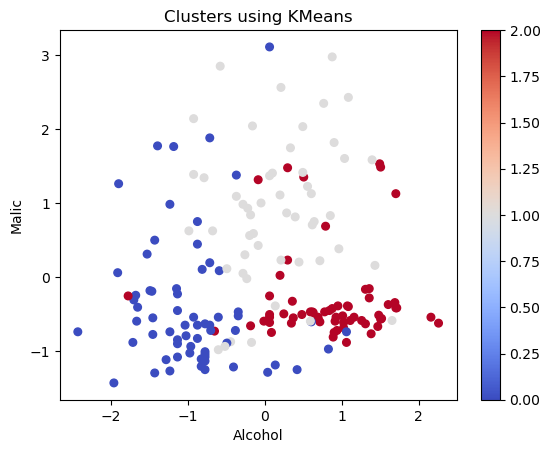

In [254]:
df_kmeans.plot(x="Alcohol",y ="Malic",c=clusters_kmeans.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans')

In [255]:
# some of clusters are overlapping

<Axes: xlabel='Alcohol', ylabel='Malic'>

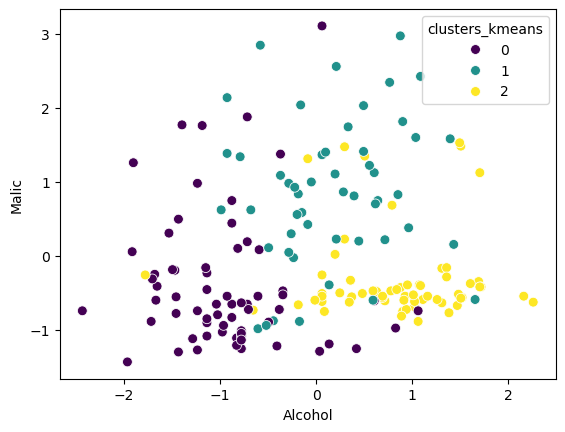

In [256]:
sns.scatterplot(data=df_kmeans,x='Alcohol',y='Malic',hue='clusters_kmeans',s=50,palette='viridis')

In [257]:
# its good clustering but some of clusters are overlapping

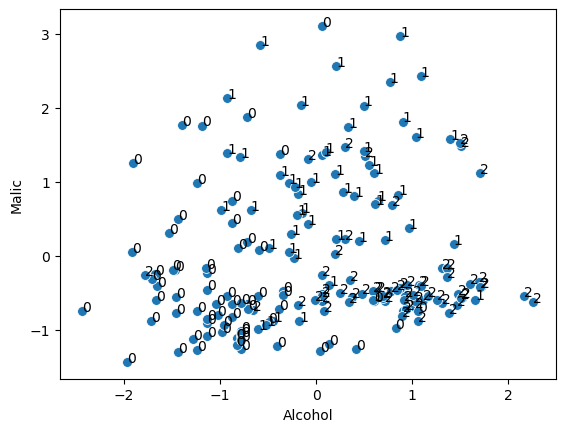

In [258]:
p1 = sns.scatterplot(data=df_kmeans,x='Alcohol',y='Malic',s = 50)
for line in range(0,df_kmeans.shape[0]):
     p1.text(df_kmeans.Alcohol[line], df_kmeans.Malic[line], df_kmeans.clusters_kmeans[line], horizontalalignment='left', size='medium')

In [259]:
# plot to see the clusters numerical values

# Task 4: Clustering with PCA Data:

C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

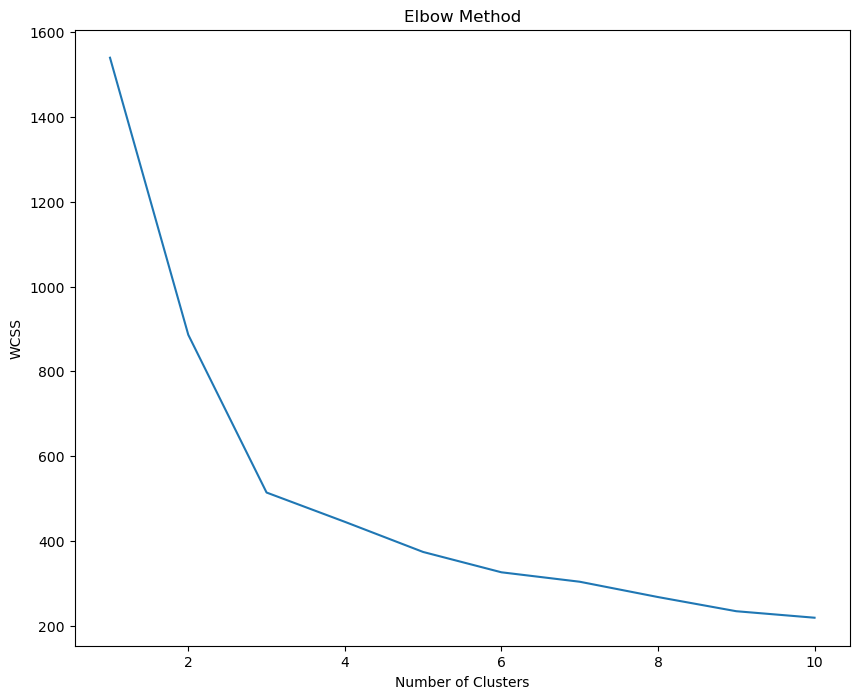

In [261]:
# finding the optimal number of cluster using elbow method for KMeans clustering on PCA data
fig = plt.figure(figsize=(10, 8))
wcss_pca = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i)
    kmeans_pca.fit(df_std_pca)
    wcss_pca.append(kmeans_pca.inertia_)
plt.plot(range(1, 11), wcss_pca)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [262]:
# Apply K-means clustering on PCA data
clusters_kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = clusters_kmeans_pca.fit_predict(df_std_pca)

C:\Users\Rajesh Pabbati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [263]:
clusters_kmeans_pca.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [264]:
y_kmeans_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [265]:
clusters_kmeans_pca.cluster_centers_

array([[-3.69566084e-02,  1.77223945e+00,  1.86138728e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03]])

In [266]:
clusters_kmeans_pca.inertia_

513.056464591077

In [267]:
# storing the cluster values in seperate column for PCA data
df_kmeans_pca = pd.DataFrame(df_std_pca)
df_kmeans_pca['clusters_kmeans_pca'] = clusters_kmeans_pca.labels_
df_kmeans_pca.head()

,pc1,pc2,pc3,clusters_kmeans_pca
0,3.316751,-1.443463,-0.165739,2
1,2.209465,0.333393,-2.026457,2
2,2.516740,-1.031151,0.982819,2
3,3.757066,-2.756372,-0.176192,2
4,1.008908,-0.869831,2.026688,2


In [268]:
# checking the mean of PCA data
df_kmeans_pca.groupby('clusters_kmeans_pca').mean()

,pc1,pc2,pc3
clusters_kmeans_pca,,,
0,-0.036957,1.772239,0.186139
1,-2.720036,-1.125651,-0.239093
2,2.276194,-0.932054,0.001528


In [269]:
# checking the number of values for each unique value for PCA data
df_kmeans_pca['clusters_kmeans_pca'].value_counts()

clusters_kmeans_pca
0    65
2    62
1    51
Name: count, dtype: int64

In [270]:
# Silhouette score and Davies–Bouldin index for PCA data
silhouette_pca = silhouette_score(df_std_pca, clusters_kmeans_pca.labels_)
davies_bouldin_pca = davies_bouldin_score(df_std_pca, clusters_kmeans_pca.labels_)

print(f'Silhouette Score: {silhouette_pca}')
print(f'Davies–Bouldin Index: {davies_bouldin_pca}')

Silhouette Score: 0.4537999848257617
Davies–Bouldin Index: 0.8388559996726336


In [271]:
# compare to KMeans CLustering one PCA KMeans Clustering Silhouette score is high and Davies-Bouldin Index is low some of the overlapping reduced

In [272]:
wcss_pca

[1539.5034801883075,
 886.1611364823503,
 514.2530230200014,
 445.1674399256824,
 374.1191808278654,
 326.1892193161799,
 303.92950246888967,
 267.8094684164456,
 234.40297200828837,
 219.07033888333254]

Text(0.5, 1.0, 'Clusters using KMeans PCA')

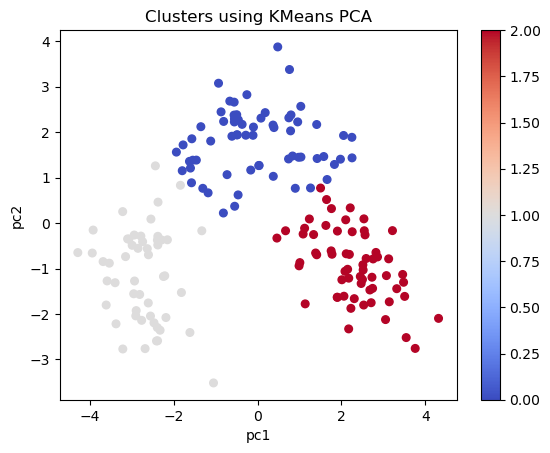

In [273]:
df_kmeans_pca.plot(x="pc1",y ="pc2",c=clusters_kmeans_pca.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm)
plt.title('Clusters using KMeans PCA')

In [274]:
# Almost no overlapping of clusters

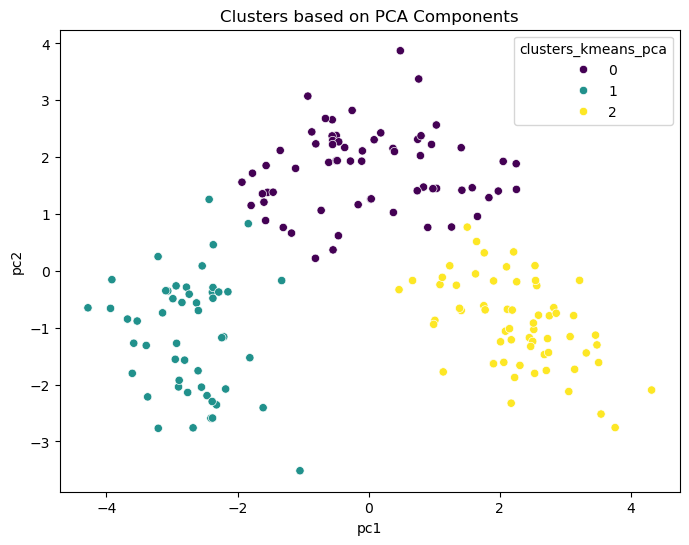

In [275]:
# Scatter plot to visualize PCA clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_kmeans_pca, x='pc1', y='pc2', hue='clusters_kmeans_pca', palette='viridis')
plt.title('Clusters based on PCA Components')
plt.show()

In [276]:
# overlapping of clusters in negligible

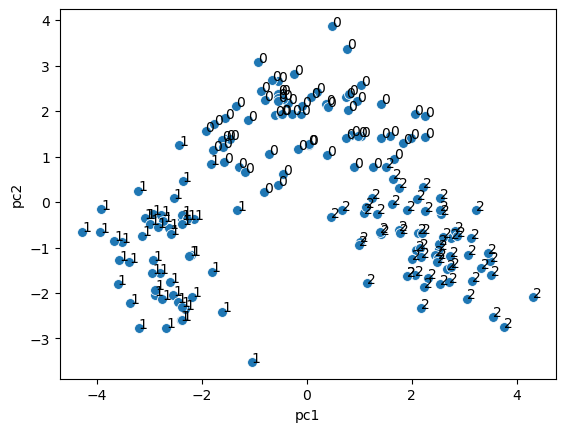

In [277]:
p1 = sns.scatterplot(data=df_kmeans_pca,x='pc1',y='pc2',s = 50)
for line in range(0,df_kmeans_pca.shape[0]):
     p1.text(df_kmeans_pca.pc1[line], df_kmeans_pca.pc2[line], df_kmeans_pca.clusters_kmeans_pca[line], horizontalalignment='left', size='medium')

In [278]:
# numerical values of clusters are visible

# Task 5: Comparison and Analysis:

In [280]:
print("Original Data Clustering Performance:")
print(f"Silhouette Score: {silhouette}")
print(f"Davies–Bouldin Index: {davies_bouldin}")

print("\nPCA Data Clustering Performance:")
print(f"Silhouette Score: {silhouette_pca}")
print(f"Davies–Bouldin Index: {davies_bouldin_pca}")

Original Data Clustering Performance:
Silhouette Score: 0.2848589191898987
Davies–Bouldin Index: 1.389187977718165

PCA Data Clustering Performance:
Silhouette Score: 0.4537999848257617
Davies–Bouldin Index: 0.8388559996726336


In [281]:
# Compare to KMeans Clustering on original standard scaled data PCA standard scaled data Silhouette Score is high and Davies_Bouldin Index is less
# PCA give more clear cluster with less overlapping

In [282]:
print(f"kmeans: {clusters_kmeans.inertia_}")
print(f"kmeans pca: {clusters_kmeans_pca.inertia_}")

kmeans: 1277.9284888446423
kmeans pca: 513.056464591077


In [283]:
# PCA applied KMeans Clustering give less error

In [284]:
print(df_kmeans['clusters_kmeans'].value_counts())
print(df_kmeans_pca['clusters_kmeans_pca'].value_counts())

clusters_kmeans
0    65
2    62
1    51
Name: count, dtype: int64
clusters_kmeans_pca
0    65
2    62
1    51
Name: count, dtype: int64


In [285]:
# Both are able to identigy equal values in cluster but overlapping is different

In [286]:
print(f"kmeans:\n {wcss}\n")
print(f"kmeans_pca:\n {wcss_pca}")

kmeans:
 [2314.0, 1659.00796725115, 1279.9661527749454, 1188.2388725452267, 1115.705787438449, 1074.8396182624206, 1027.9567305564642, 966.766508743574, 945.2292861212629, 850.4353010402094]

kmeans_pca:
 [1539.5034801883075, 886.1611364823503, 514.2530230200014, 445.1674399256824, 374.1191808278654, 326.1892193161799, 303.92950246888967, 267.8094684164456, 234.40297200828837, 219.07033888333254]


In [287]:
# PCA has less error

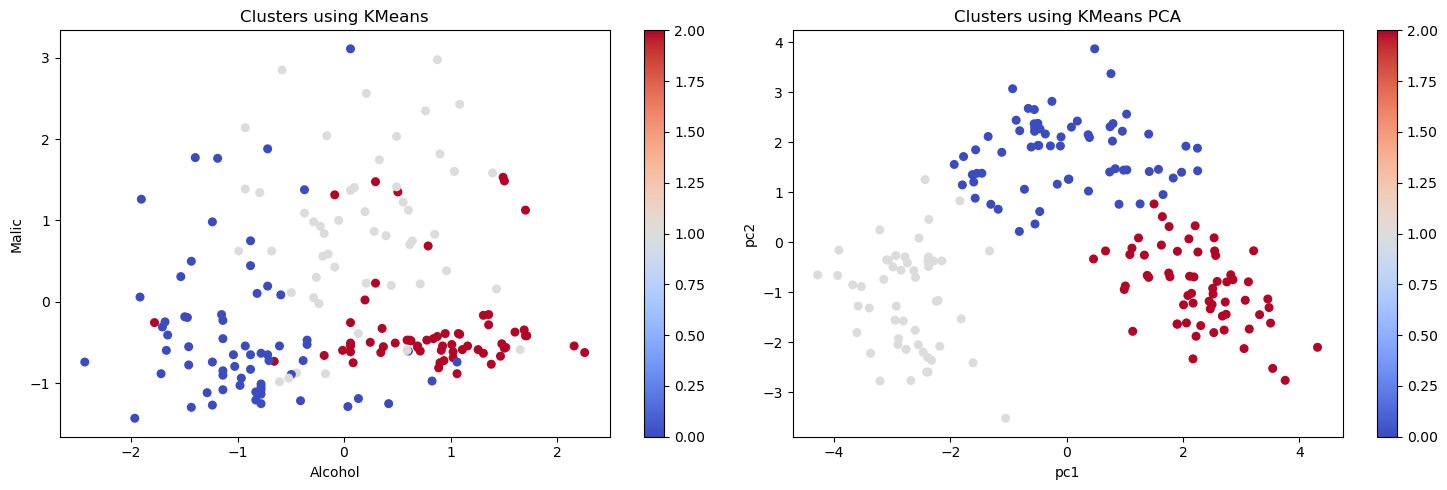

In [288]:
# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# First plot: Clusters using KMeans
df_kmeans.plot(x="Alcohol", y="Malic", c=clusters_kmeans.labels_, kind="scatter", s=30, cmap=plt.cm.coolwarm, ax=ax[0])
ax[0].set_title('Clusters using KMeans')

# Second plot: Clusters using KMeans PCA
df_kmeans_pca.plot(x="pc1", y="pc2", c=clusters_kmeans_pca.labels_, kind="scatter", s=30, cmap=plt.cm.coolwarm, ax=ax[1])
ax[1].set_title('Clusters using KMeans PCA')

# Display the plots
plt.tight_layout()
plt.show()

In [289]:
# PCA give proper clustering

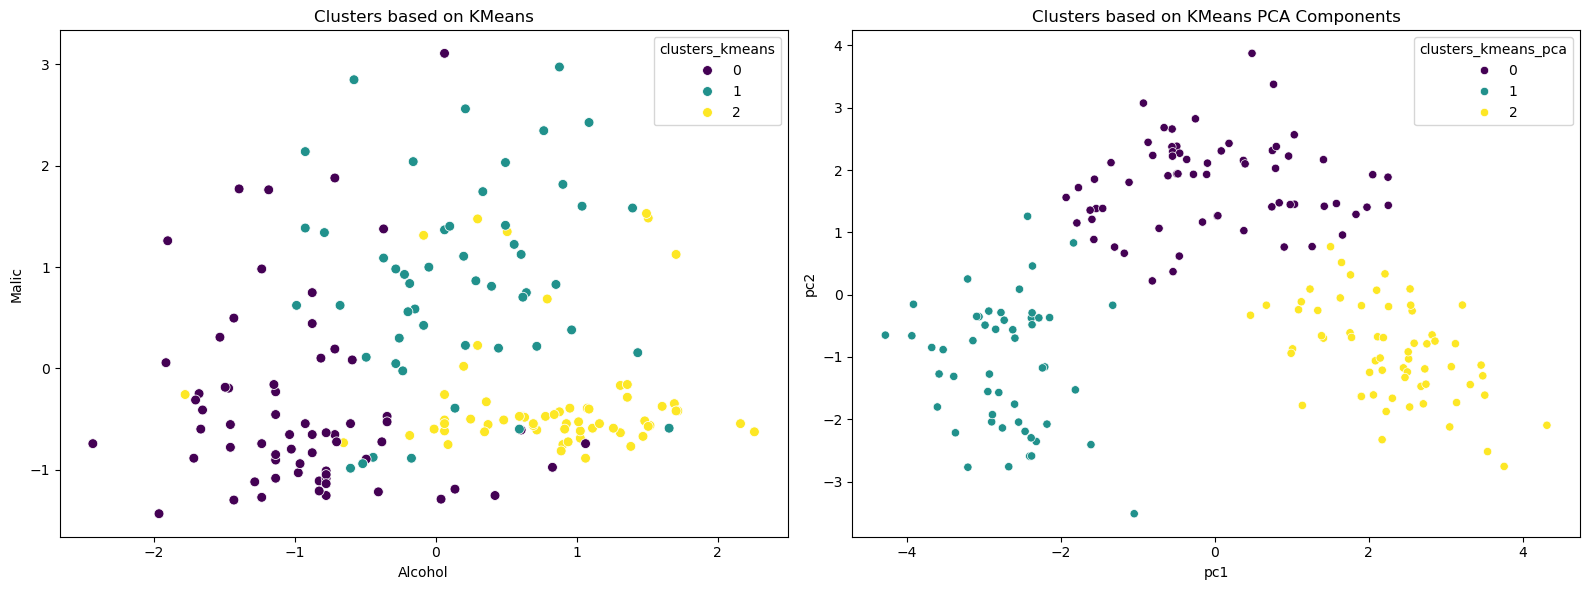

In [290]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot to visualize clusters based on KMeans
sns.scatterplot(data=df_kmeans, x='Alcohol', y='Malic', hue='clusters_kmeans', s=50, palette='viridis', ax=axes[0])
axes[0].set_title('Clusters based on KMeans')

# Scatter plot to visualize PCA clusters
sns.scatterplot(data=df_kmeans_pca, x='pc1', y='pc2', hue='clusters_kmeans_pca', palette='viridis', ax=axes[1])
axes[1].set_title('Clusters based on KMeans PCA Components')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [291]:
# PCA applied data and clustering give proper clusters

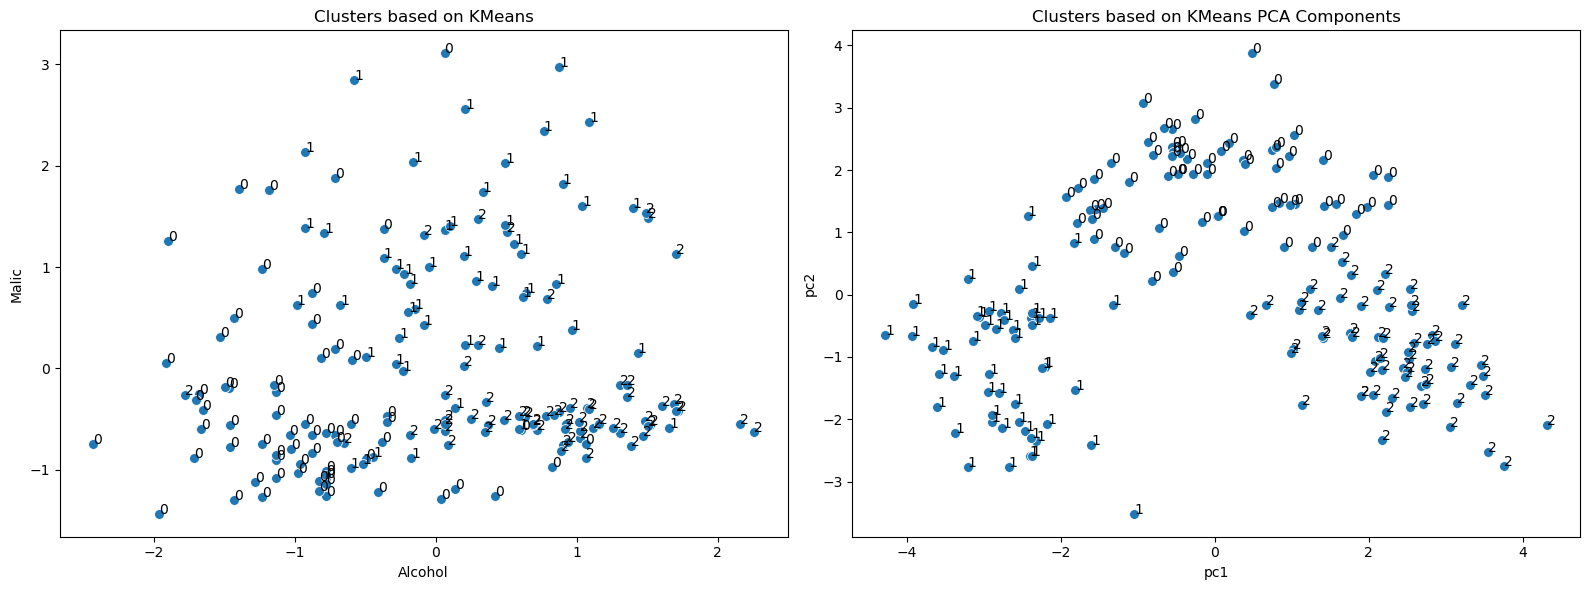

In [292]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot: Scatter plot to visualize clusters based on KMeans
p1 = sns.scatterplot(data=df_kmeans, x='Alcohol', y='Malic', s=50, ax=axes[0])
for line in range(0, df_kmeans.shape[0]):
    p1.text(df_kmeans.Alcohol[line], df_kmeans.Malic[line], df_kmeans.clusters_kmeans[line], 
            horizontalalignment='left', size='medium', color='black')
axes[0].set_title('Clusters based on KMeans')

# Second plot: Scatter plot to visualize PCA clusters
p2 = sns.scatterplot(data=df_kmeans_pca, x='pc1', y='pc2', s=50, ax=axes[1])
for line in range(0, df_kmeans_pca.shape[0]):
    p2.text(df_kmeans_pca.pc1[line], df_kmeans_pca.pc2[line], df_kmeans_pca.clusters_kmeans_pca[line], 
            horizontalalignment='left', size='medium', color='black')
axes[1].set_title('Clusters based on KMeans PCA Components')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Task 6: Conclusion and Insights

In [294]:
# PCA gives less errors
# PCA gives clusters without overlapping
# PCA give more accurate results

In [295]:
# I suggest to use PCA because it give better results